# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Precios públicos de servicios sanitarios prestados en el SSPA" - 7/09/2021

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from statistics import mean
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.5 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>dataset_preciospublicos_sspa.csv</code> en el que se encuentra información de los precios públicos de los servicios sanitarios prestados por Centros dependientes del Sistema Sanitario Público de Andalucía (SSPA). El fichero se encuentra en la carpeta <code>./datos</code>. 

Cada línea del fichero de entrada se corresponde con los datos de un servicio (servicios sanitarios prestados en centros de atención primaria, transporte sanitario, servicios sanitarios prestados en Centros Hospitalarios, servicios sanitarios prestados en centros de transfusión sanguínea, bancos de sangre y bancos de tejidos) y contiene las siguientes informaciones:

- **familia:** familia del servicio, que podrá tener uno de los siguientes cuatro valores: *atención primaria*, *transporte sanitario*, *centros hospitalarios* o *sangre/hemoderivados/banco de tejidos*. Este campo será de tipo cadena.
- **grupo:** para cada una de las familias anteriores existen varios grupos de especialización. Por ejemplo, en el caso de la familia *transporte sanitario*, los posible grupos son: *transporte sanitario*, o *transporte emergencia sanitaria*. Este campo será de tipo cadena.
- **articulo:** código del artículo para el que se aporta el nombre y el precio. Está formado por varios dígitos. Este campo será de tipo cadena.
- **nombre:** nombre del artículo para el cual se dispone de un precio. Por ejemplo, dentro de la familia *sangre/hemoderivados/banco de tejidos* existe un grupo *otros bancos* con un artículo *IV.3.1.3*, de nombre *LECHE MATERNA. LECHE MATERNA 200 CC* y precio *40,07*. Este campo nombre será de tipo cadena.
- **precio:** precio del producto, de tipo real.

Para comprender mejor este conjunto de datos se recomienda consultar el fichero .csv que se adjunta.
He aquí un fragmento con las primeras líneas del fichero de entrada:


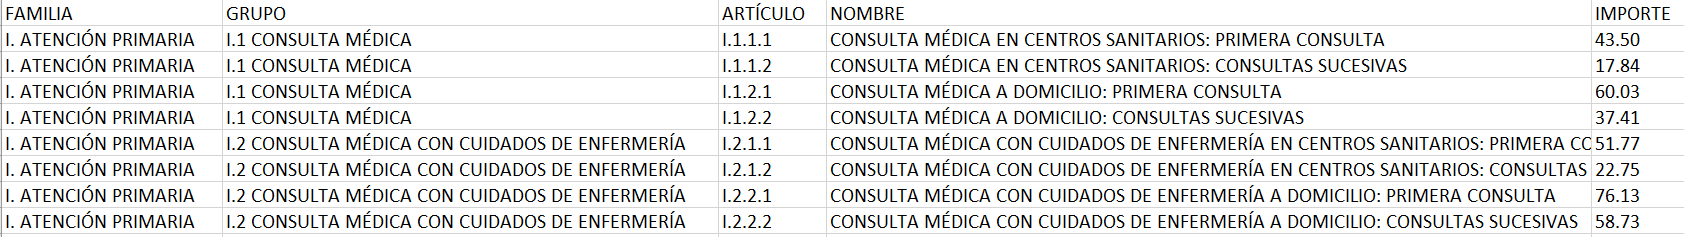

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Servicio = namedtuple('Servicio', 'familia grupo articulo nombre precio')

def lee_servicios(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de servicios
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de servicios -> [Servicio(str, str, str, str, float)]
    '''
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f, delimiter=',')
        next(lector)
        servicios = [Servicio(familia, grupo, articulo, nombre, float(precio))
                    for familia, grupo, articulo, nombre, precio in lector]
    return servicios

In [3]:
# Test de la función lee_servicios
SERVICIOS = lee_servicios('./datos/dataset_preciospublicos_sspa.csv')

# La salida esperada de la siguiente instrucción es: 
#   3112 [Servicio(familia='I. ATENCIÓN PRIMARIA', grupo='I.1 CONSULTA MÉDICA', articulo='I.1.1.1', 
#   nombre='CONSULTA MÉDICA EN CENTROS SANITARIOS: PRIMERA CONSULTA', precio=43.5), 
#   Servicio(familia='I. ATENCIÓN PRIMARIA', grupo='I.1 CONSULTA MÉDICA', articulo='I.1.1.2',
#   nombre='CONSULTA MÉDICA EN CENTROS SANITARIOS: CONSULTAS SUCESIVAS', precio=17.84)]
print(len(SERVICIOS), SERVICIOS[:2])

3112 [Servicio(familia='I. ATENCIÓN PRIMARIA', grupo='I.1 CONSULTA MÉDICA', articulo='I.1.1.1', nombre='CONSULTA MÉDICA EN CENTROS SANITARIOS: PRIMERA CONSULTA', precio=43.5), Servicio(familia='I. ATENCIÓN PRIMARIA', grupo='I.1 CONSULTA MÉDICA', articulo='I.1.1.2', nombre='CONSULTA MÉDICA EN CENTROS SANITARIOS: CONSULTAS SUCESIVAS', precio=17.84)]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>servicios_familia</code>. Recibe el nombre de una familia (*I. ATENCIÓN PRIMARIA* por defecto) y devuelve una lista de tuplas (nombre, precio) con todos los servicios de dicha familia, ordenada por orden alfabético.

In [4]:
def servicios_familia(servicios, familia='I. ATENCIÓN PRIMARIA'):
    ''' Lista ordenada de servicios y precios de la familia
    
    ENTRADA:
       - servicios: lista de servicios -> [Servicio(str, str, str, str, float)]
       - familia: nombre de una familia de servicios. Por defecto: I. ATENCIÓN PRIMARIA
    SALIDA:
       - Lista de tuplas (nombre, precio) en orden alfabético de nombres -> [(str, float)]
    '''
    return sorted([(s.nombre,s.precio) for s in servicios if s.familia==familia])

In [5]:
# Test de la función servicios_familia

# La salida esperada de las siguientes instrucciones es: 
# 12  servicios de transporte sanitario
# [('KILOMETROS POR SERVICIO INTERURBANO', 2.2), ('KILOMETROS POR TRASLADO INTERHOSPITALARIO UVI MÓVIL ZONA INTERURBANA', 2.2),
# ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA EQUIPO COORDINACIÓN AVANZADA', 365.07),
# ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA EQUIPO SOPORTE VITAL BÁSICO', 313.21),
# ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA HELICÓPTERO UVI', 3642.53), 
# ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA UVI MÓVIL TERRESTRE ZONA INTERURBANA', 817.75), 
# ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA UVI MÓVIL TERRESTRE ZONA URBANA', 727.37),
# ('TRANSPORTE EMERGENCIA SANITARIA: TRASLADO INTERHOSP.UVI MÓVIL ZONA INTERURB.', 568.51), 
# ('TRANSPORTE EMERGENCIA SANITARIA: TRASLADO INTERHOSPITALARIO HELICÓPTERO UVI EN EL TERRITORIO DE LA COMUNIDAD AUTÓNOMA DE ANDALUCÍA', 3642.53), 
# ('TRANSPORTE EMERGENCIA SANITARIA: TRASLADO INTERHOSPITALARIO UVI MÓVIL ZONA URBANA', 568.51), 
# ('TRANSPORTE SANITARIO POR SERVICIO INTERURBANO', 165.0), ('TRANSPORTE SANITARIO POR SERVICIO URBANO', 165.0)]

transportes = servicios_familia(SERVICIOS,'II. TRANSPORTE SANITARIO')
print(len(transportes), ' servicios de transporte sanitario:')
print(transportes)

12  servicios de transporte sanitario:
[('KILOMETROS POR SERVICIO INTERURBANO', 2.2), ('KILOMETROS POR TRASLADO INTERHOSPITALARIO UVI MÓVIL ZONA INTERURBANA', 2.2), ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA EQUIPO COORDINACIÓN AVANZADA', 365.07), ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA EQUIPO SOPORTE VITAL BÁSICO', 313.21), ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA HELICÓPTERO UVI', 3642.53), ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA UVI MÓVIL TERRESTRE ZONA INTERURBANA', 817.75), ('TRANSPORTE EMERGENCIA SANITARIA: ASISTENCIA UVI MÓVIL TERRESTRE ZONA URBANA', 727.37), ('TRANSPORTE EMERGENCIA SANITARIA: TRASLADO INTERHOSP.UVI MÓVIL ZONA INTERURB.', 568.51), ('TRANSPORTE EMERGENCIA SANITARIA: TRASLADO INTERHOSPITALARIO HELICÓPTERO UVI EN EL TERRITORIO DE LA COMUNIDAD AUTÓNOMA DE ANDALUCÍA', 3642.53), ('TRANSPORTE EMERGENCIA SANITARIA: TRASLADO INTERHOSPITALARIO UVI MÓVIL ZONA URBANA', 568.51), ('TRANSPORTE SANITARIO POR SERVICIO INTERURBANO', 165.0), ('TRANSPORTE SANITA

La siguiente función se llama <code>precio_medio_servicios</code>. Toma una lista de servicios y un parámetro de tipo cadena opcional, y cuyo valor por defecto será la cadena vacía. Si el valor del parámetro es la cadena vacía, se devolverá una lista de tuplas con los precios medios de los servicios de cada familia. Si, por el contrario, el parámetro opcional contiene el nombre de una familia de servicios en concreto, se devolverá una lista de tuplas con los precios medios de los servicios de los distintos grupos de dicha familia. La lista devuelta deberá estar ordenada por orden creciente de precio medio.

Para calcular el precio medio se aconseja hacer uso de la función *mean* del paquete *statistics*, que se encuentra importada al principio del documento.

In [6]:
def precio_medio_servicios(servicios, familia=''):
    ''' Calcula precios medios por familia o grupos
    
    ENTRADA:
       - servicios: lista de servicios -> [Servicio(str, str, str, str, float)]
       - familia: nombre de la familia a tener en cuenta -> str
     SALIDA:
       - lista de tuplas con los precios medios, ordenada por orden creciente de precio medio -> [(str,float)]
    '''
    if familia == '':
        familias = {s.familia for s in servicios}
        precios = sorted([(f,mean(s.precio for s in servicios if s.familia==f)) for f in familias],key=lambda t:t[1])
        
    else:
        grupos = {s.grupo for s in servicios if s.familia==familia}
        precios = sorted([(grupo,mean(s.precio for s in servicios if s.grupo==grupo)) for grupo in grupos],key=lambda t:t[1])
        
    return precios

In [7]:
# Test de la función precio_medio_servicios

# La salida esperada de las siguientes instrucciones es: 
# Precios medios por familia:
# [('I. ATENCIÓN PRIMARIA', 116.07906086956521), ('IV. SANGRE/HEMODERIVADOS/BANCO DE TEJIDOS', 708.3976061776061),
#  ('II. TRANSPORTE SANITARIO', 914.99), ('III. CENTROS HOSPITALARIOS', 3625.749011473963)]

# Precios medios por grupo para Centros Hospitalarios:
# [('III.8 REHABILITACIÓN', 148.85571428571427), ('III.6 CRIBADO Y DIAGNÓSTICO PRENATAL Y NEONATAL', 162.48),
#  ('III.3 PRUEBAS DIAGNÓSTICAS/TERAPÉUTICAS/LABORATORIO/ANATOMÍA PATOLÓGICA/RADIOTERAPIA', 722.3112649700598), 
#  ('III.2 CIRUGÍA MAYOR/MENOR AMBULATORIA', 2363.9437654320986), ('III.1 HOSPITALIZACIÓN', 9055.474115107914),
#  ('III.7 PRÓTESIS INTERNAS', 9386.42)]

print('Precios medios por familia:\n',precio_medio_servicios(SERVICIOS))
print()
print('Precios medios por grupo para Centros Hospitalarios:\n',precio_medio_servicios(SERVICIOS,'III. CENTROS HOSPITALARIOS'))

Precios medios por familia:
 [('I. ATENCIÓN PRIMARIA', 116.07906086956521), ('IV. SANGRE/HEMODERIVADOS/BANCO DE TEJIDOS', 708.3976061776061), ('II. TRANSPORTE SANITARIO', 914.99), ('III. CENTROS HOSPITALARIOS', 3625.749011473963)]

Precios medios por grupo para Centros Hospitalarios:
 [('III.8 REHABILITACIÓN', 148.85571428571427), ('III.6 CRIBADO Y DIAGNÓSTICO PRENATAL Y NEONATAL', 162.48), ('III.3 PRUEBAS DIAGNÓSTICAS/TERAPÉUTICAS/LABORATORIO/ANATOMÍA PATOLÓGICA/RADIOTERAPIA', 722.3112649700598), ('III.2 CIRUGÍA MAYOR/MENOR AMBULATORIA', 2363.9437654320986), ('III.1 HOSPITALIZACIÓN', 9055.474115107914), ('III.7 PRÓTESIS INTERNAS', 9386.42)]


A continuación haga uso de la función anterior para responder a la siguientes pregunta. No es necesario implementar una función para ello, tan sólo es necesario escribir las instrucciones apropiadas para invocar a la función anterior de forma adecuada.

Para resolver este ejercicio no se deberá usar los nombres concretos de las familias. Es decir, las instrucciones deben ser igualmente válidas si utilizáramos otro fichero con otros nombres de familias y/o grupos.

In [8]:
### EJERCICIO: imprimir el precio medio por grupo de todas las familias de servicios
familias = {s.familia for s in SERVICIOS}
for familia in familias:
    print('\nPrecios medios para ', familia, ':\n', precio_medio_servicios(SERVICIOS, familia))

# La salida esperada es:
# Precio medio para  I. ATENCIÓN PRIMARIA :
# [('I.3 CONSULTA DE ENFERMERÍA (SIN INTERVENCIÓN MÉDICA)', 25.015), ('I.5 FISIOTERAPIA-REHABILITACIÓN', 37.927058823529414),
#  ('I.1 CONSULTA MÉDICA', 39.695), ('I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA', 52.345), 
#  ('I.7 CONSULTA DE URGENCIA', 81.92666666666666), ('I.6 LABORATORIOS CLÍNICOS', 96.55071153846154), 
#  ('I.4 CIRUGÍA MENOR AMBULATORIA', 609.2144)]

# Precio medio para  II. TRANSPORTE SANITARIO :
# [('II.1 TRANSPORTE SANITARIO', 110.73333333333333), ('II.2 TRANSPORTE EMERGENCIA SANITARIA', 1183.0755555555556)]

# Precio medio para  III. CENTROS HOSPITALARIOS :
# [('III.8 REHABILITACIÓN', 148.85571428571427), ('III.6 CRIBADO Y DIAGNÓSTICO PRENATAL Y NEONATAL', 162.48),
#  ('III.3 PRUEBAS DIAGNÓSTICAS/TERAPÉUTICAS/LABORATORIO/ANATOMÍA PATOLÓGICA/RADIOTERAPIA', 722.3112649700598),
#  ('III.2 CIRUGÍA MAYOR/MENOR AMBULATORIA', 2363.9437654320986), ('III.1 HOSPITALIZACIÓN', 9055.474115107914),
#  ('III.7 PRÓTESIS INTERNAS', 9386.42)]

# Precio medio para  IV. SANGRE/HEMODERIVADOS/BANCO DE TEJIDOS :
# [('IV.3 OTROS BANCOS', 30.105), ('IV.1 SANGRE/HEMODERIVADOS/PRUEBAS/REACTIVOS', 145.35835616438357),
#  ('IV.2 BANCO DE TEJIDOS', 1487.451743119266)]


Precios medios para  II. TRANSPORTE SANITARIO :
 [('II.1 TRANSPORTE SANITARIO', 110.73333333333333), ('II.2 TRANSPORTE EMERGENCIA SANITARIA', 1183.0755555555556)]

Precios medios para  IV. SANGRE/HEMODERIVADOS/BANCO DE TEJIDOS :
 [('IV.3 OTROS BANCOS', 30.105), ('IV.1 SANGRE/HEMODERIVADOS/PRUEBAS/REACTIVOS', 145.35835616438357), ('IV.2 BANCO DE TEJIDOS', 1487.451743119266)]

Precios medios para  I. ATENCIÓN PRIMARIA :
 [('I.3 CONSULTA DE ENFERMERÍA (SIN INTERVENCIÓN MÉDICA)', 25.015), ('I.5 FISIOTERAPIA-REHABILITACIÓN', 37.927058823529414), ('I.1 CONSULTA MÉDICA', 39.695), ('I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA', 52.345), ('I.7 CONSULTA DE URGENCIA', 81.92666666666666), ('I.6 LABORATORIOS CLÍNICOS', 96.55071153846154), ('I.4 CIRUGÍA MENOR AMBULATORIA', 609.2144)]

Precios medios para  III. CENTROS HOSPITALARIOS :
 [('III.8 REHABILITACIÓN', 148.85571428571427), ('III.6 CRIBADO Y DIAGNÓSTICO PRENATAL Y NEONATAL', 162.48), ('III.3 PRUEBAS DIAGNÓSTICAS/TERAPÉUTICAS/LABORATORIO/A

La siguiente función de esta sección se llama <code>nombres_servicios</code>. Toma como entradas una lista de servicios y una función que define una condición, y devuelve un conjunto con los nombres de los servicios que cumplan dicha condición. La condición estará basada en alguno o algunos de los campos del servicio.

Como parte de este ejercicio se deberá implementar también la cabecera de la función, que no se proporciona.

In [9]:
# sustituir esta línea por la cabecera de la función
def nombres_servicios(servicios, condicion):
    ''' Devuelve el nombre de los servicios cumplen la condición
    
    ENTRADA:
       - servicios: lista de servicios -> [Servicio(str, str, str, str, float)]
       - condicion: nombre de función, o expresión lambda -> function
    SALIDA:
       - conjunto con los nombres de los servicios que cumplen la condición -> {str}
    '''
    return {s.nombre for s in servicios if condicion(s)}

In [10]:
### EJERCICIO: implementar dos llamadas de TEST de 'nombres_servicios' que obtengan:
#  - Los nombres de los servicios del grupo 'I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA'
#  - Los nombres de los servicios del grupo 'I.5 FISIOTERAPIA-REHABILITACIÓN' que tengan un precio superior a 100€

# Las salidas esperadas para estas consultas son (el orden de los elementos del conjunto puede variar):
# Nombres de los servicios del grupo: I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA:
# {'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA EN CENTROS SANITARIOS: CONSULTAS SUCESIVAS', 
#  'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA EN CENTROS SANITARIOS: PRIMERA CONSULTA', 
#  'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA A DOMICILIO: CONSULTAS SUCESIVAS', 
#  'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA A DOMICILIO: PRIMERA CONSULTA'}

# Nombres de los servicios del grupo I.5 FISIOTERAPIA-REHABILITACIÓN con precio mayor a 100€:
# {'FISIOTERAPIA-REHAB. PROCEDIMIENTOS TERAPEÚTICOS: TERAPIA OCUPACIONAL (NO INCLUIDO COSTE MATERIAL)',
#  'FISIOTERAPIA-REHAB. PROCEDIMIENTOS TERAPEÚTICOS: TERAPIA DE FAMILIA',
#  'FISIOTERAPIA-REHAB. PROCEDIMIENTOS TERAPEÚTICOS: TERAPIA GRUPAL'}

print('Nombres de los servicios del grupo: I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA:\n',nombres_servicios(SERVICIOS, lambda s:s.grupo=='I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA'))
print()
print('Nombres de los servicios del grupo I.5 FISIOTERAPIA-REHABILITACIÓN con precio mayor a 100€:\n',nombres_servicios(SERVICIOS, lambda s:s.grupo=='I.5 FISIOTERAPIA-REHABILITACIÓN' and s.precio>100))

Nombres de los servicios del grupo: I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA:
 {'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA A DOMICILIO: PRIMERA CONSULTA', 'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA EN CENTROS SANITARIOS: PRIMERA CONSULTA', 'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA EN CENTROS SANITARIOS: CONSULTAS SUCESIVAS', 'CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA A DOMICILIO: CONSULTAS SUCESIVAS'}

Nombres de los servicios del grupo I.5 FISIOTERAPIA-REHABILITACIÓN con precio mayor a 100€:
 {'FISIOTERAPIA-REHAB. PROCEDIMIENTOS TERAPEÚTICOS: TERAPIA OCUPACIONAL (NO INCLUIDO COSTE MATERIAL)', 'FISIOTERAPIA-REHAB. PROCEDIMIENTOS TERAPEÚTICOS: TERAPIA GRUPAL', 'FISIOTERAPIA-REHAB. PROCEDIMIENTOS TERAPEÚTICOS: TERAPIA DE FAMILIA'}


La siguiente función se llama <code>diccionario_funcion_precio</code>. Toma como entrada una lista de servicios, y produce como salida un diccionario cuyas claves son los nombres de los grupos y los valores serán calculados a partir de una función que se reciba como parámetro, y se aplique al campo del precio. De esta forma, podremos utilizar la función <code>diccionario_funcion_precio</code>, por ejemplo, para obtener el precio mayor, menor o medio por grupo.

In [11]:
def diccionario_funcion_precio(servicios,funcion):
    ''' Crea un diccionario con una función aplicada a los precios de los servicios de cada grupo
    
    ENTRADA:
       - servicios: lista de servicios -> [Servicio(str, str, str, str, float)]
    SALIDA:
       - diccionario con la aplicación de la función a los precios de los servicios de cada grupo -> {str: float}
    '''
    precios_func = dict()
    grupos = {s.grupo for s in servicios}
    for g in grupos:
        precios = [s.precio for s in servicios if s.grupo==g]
        precios_func[g] = funcion(precios)
        
    return precios_func

In [12]:
# Test de la función diccionario_funcion_precio

# La salida esperada de la siguiente instrucción es: 
# {'II.2 TRANSPORTE EMERGENCIA SANITARIA': 3642.53,
#  'I.7 CONSULTA DE URGENCIA': 110.49,
#  'IV.2 BANCO DE TEJIDOS': 23254.73,
#  'III.2 CIRUGÍA MAYOR/MENOR AMBULATORIA': 9209.71,
#  'I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA': 76.13,
#  'I.4 CIRUGÍA MENOR AMBULATORIA': 1060.33,
#  'III.7 PRÓTESIS INTERNAS': 97748.64,
#  'I.1 CONSULTA MÉDICA': 60.03,
#  'III.8 REHABILITACIÓN': 420.25,
#  'III.6 CRIBADO Y DIAGNÓSTICO PRENATAL Y NEONATAL': 304.4,
#  'IV.3 OTROS BANCOS': 49.47,
#  'I.6 LABORATORIOS CLÍNICOS': 2329.8,
#  'II.1 TRANSPORTE SANITARIO': 165.0,
#  'III.1 HOSPITALIZACIÓN': 135542.63,
#  'IV.1 SANGRE/HEMODERIVADOS/PRUEBAS/REACTIVOS': 2000.0,
#  'I.5 FISIOTERAPIA-REHABILITACIÓN': 161.55,
#  'I.3 CONSULTA DE ENFERMERÍA (SIN INTERVENCIÓN MÉDICA)': 29.15,
#  'III.3 PRUEBAS DIAGNÓSTICAS/TERAPÉUTICAS/LABORATORIO/ANATOMÍA PATOLÓGICA/RADIOTERAPIA': 12809.32}

diccionario_funcion_precio(SERVICIOS,max)

{'III.7 PRÓTESIS INTERNAS': 97748.64,
 'III.8 REHABILITACIÓN': 420.25,
 'IV.2 BANCO DE TEJIDOS': 23254.73,
 'III.3 PRUEBAS DIAGNÓSTICAS/TERAPÉUTICAS/LABORATORIO/ANATOMÍA PATOLÓGICA/RADIOTERAPIA': 12809.32,
 'III.6 CRIBADO Y DIAGNÓSTICO PRENATAL Y NEONATAL': 304.4,
 'IV.1 SANGRE/HEMODERIVADOS/PRUEBAS/REACTIVOS': 2000.0,
 'I.7 CONSULTA DE URGENCIA': 110.49,
 'I.5 FISIOTERAPIA-REHABILITACIÓN': 161.55,
 'I.6 LABORATORIOS CLÍNICOS': 2329.8,
 'I.3 CONSULTA DE ENFERMERÍA (SIN INTERVENCIÓN MÉDICA)': 29.15,
 'II.2 TRANSPORTE EMERGENCIA SANITARIA': 3642.53,
 'I.4 CIRUGÍA MENOR AMBULATORIA': 1060.33,
 'IV.3 OTROS BANCOS': 49.47,
 'III.1 HOSPITALIZACIÓN': 135542.63,
 'I.2 CONSULTA MÉDICA CON CUIDADOS DE ENFERMERÍA': 76.13,
 'I.1 CONSULTA MÉDICA': 60.03,
 'II.1 TRANSPORTE SANITARIO': 165.0,
 'III.2 CIRUGÍA MAYOR/MENOR AMBULATORIA': 9209.71}

## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_precios_grupo</code>. Toma como entrada una lista de servicios, y genera un diagrama de barras que muestra los precios de cada uno de los servicios de ese grupo. El diagrama de barras aparecerá ordenado de mayor a menor precio. Si no se proporciona un nombre de grupo, se mostrarán los precios de todos los servicios.

In [13]:
def muestra_precios_grupo(servicios, grupo=''):
    ''' Genera un diagrama de barras con los precios de los servicios de un determinado grupo.
    
    ENTRADA: 
       - servicios: lista de servicios -> [Servicio(str, str, str, str, float)]
    SALIDA EN PANTALLA: 
       - diagrama de barras con los precios de los servicios

    Estas son las instrucciones 'matplotlib' para trazar el gráfico:       
            fig = plt.figure()
            ax = fig.add_axes([0,0,1,1])
            ax.bar(nombres,precios)
            plt.xticks(rotation='vertical')
            plt.show()
    
    Que se apoyan en las siguientes variables:
        - nombres: lista con los nombres de los servicios
        - precios: lista, alineada con la anterior, con los precios de los servicios
    '''
    if grupo=='':
        nombres_precios = list({(s.nombre,s.precio) for s in servicios})
    else:
        nombres_precios = list({(s.nombre,s.precio) for s in servicios if s.grupo==grupo})
        
    nombres_precios = sorted(nombres_precios, key=lambda t:t[1],reverse=True)
    nombres = [n for n,p in nombres_precios]
    precios = [p for n,p in nombres_precios]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(nombres,precios)
    plt.xticks(rotation='vertical')
    plt.show()

La salida de la siguiente celda de test debería ser la siguiente:

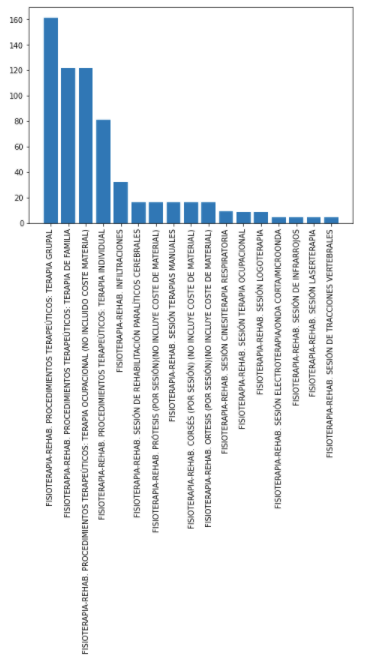

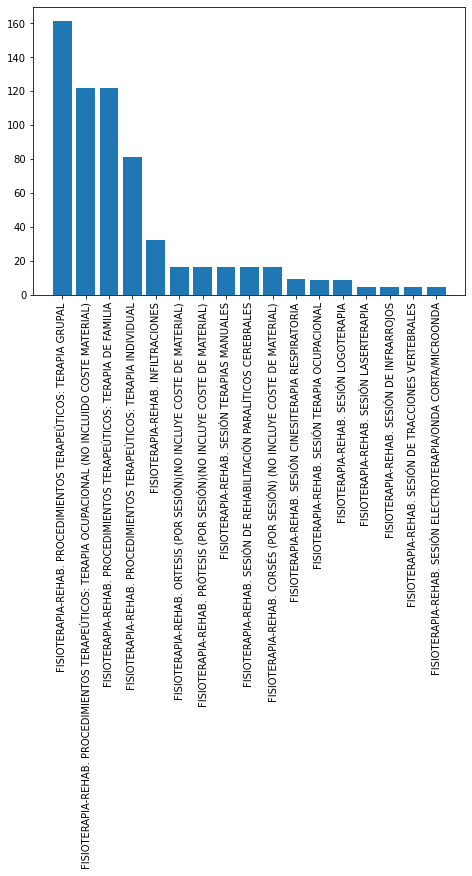

In [14]:
# Test de la función muestra_distribucion_colesterol
muestra_precios_grupo(SERVICIOS,'I.5 FISIOTERAPIA-REHABILITACIÓN')